## Half-Tone Image

number of processors: 12


((<matplotlib.image.AxesImage at 0x2a0d90500d0>,
  <matplotlib.image.AxesImage at 0x2a0d92e0850>),
 None,
 None)

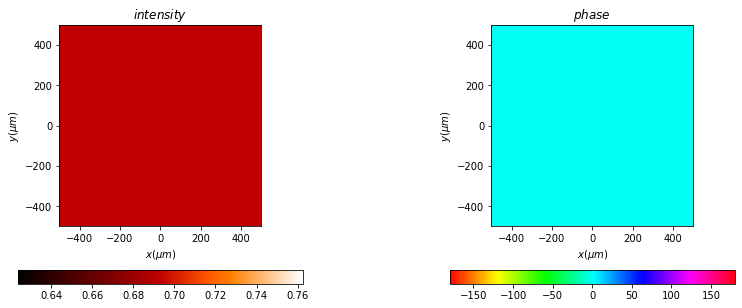

In [2]:
import numpy as np
from diffractio import mm, um, degrees
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY


# Setting up
length = 1 * mm
num_data = 512
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.633 * um

# Plane Wave Source
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()
u0.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0e2bb4fd0>,
  <matplotlib.image.AxesImage at 0x2a0dc46ec70>),
 None,
 None)

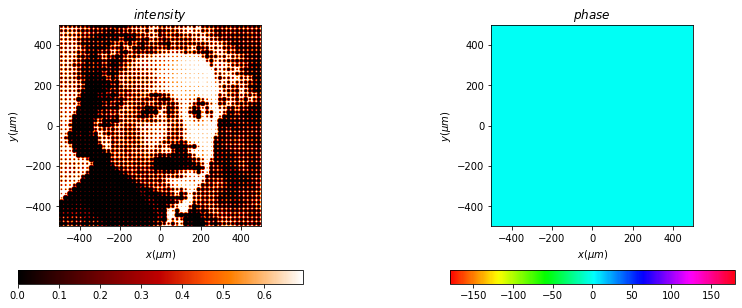

In [16]:
img = Scalar_mask_XY(x0, y0, wavelength)
img.image(
    filename="y-15-HT.png",
    normalize=True,
    canal=2,
)

img.draw(kind='field', logarithm=True)
# img.draw(kind='real_field', logarithm=True)

## Masks / Filters

((<matplotlib.image.AxesImage at 0x2a0dc51fe80>,
  <matplotlib.image.AxesImage at 0x2a0dc5bb190>),
 None,
 None)

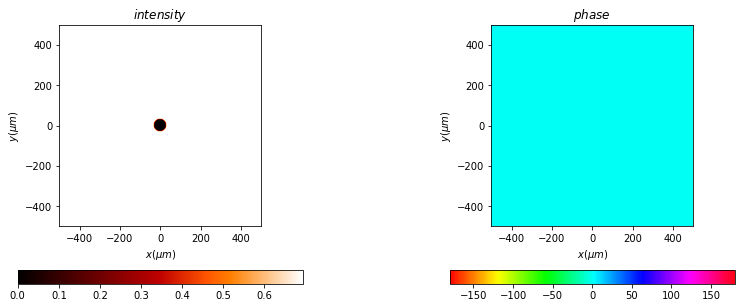

In [17]:
cDot = Scalar_mask_XY(x0, y0, wavelength)
cDot.ring(
    r0=(0 * um, 0 * um),
    radius1=(30 * um, 30 * um),
    radius2=(1000 * um, 1000 * um)
)
cDot.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0e2c4c0d0>,
  <matplotlib.image.AxesImage at 0x2a0dcc95340>),
 None,
 None)

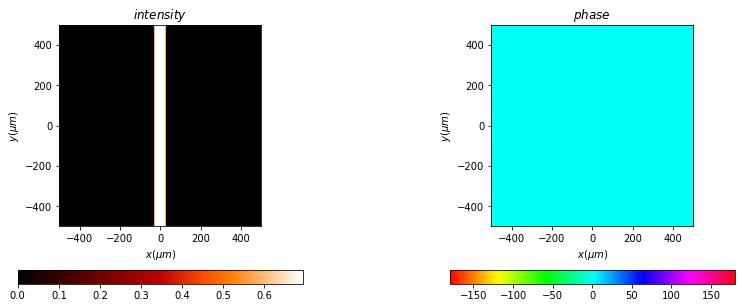

In [18]:
slit = Scalar_mask_XY(x0, y0, wavelength)
slit.slit(
    x0=0 * um,
    size=60 * um
)
slit.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0e2c06df0>,
  <matplotlib.image.AxesImage at 0x2a0e1fdcf40>),
 None,
 None)

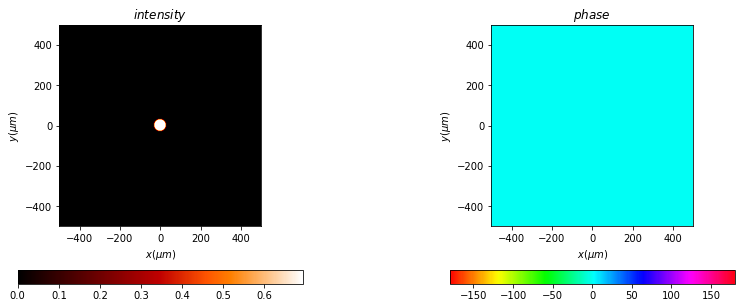

In [19]:
circ = Scalar_mask_XY(x0, y0, wavelength)
circ.circle(
    r0=(0 * um, 0 * um),
    radius=(30 * um, 30 * um),
    angle=0
)
circ.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0dce00700>,
  <matplotlib.image.AxesImage at 0x2a0df716e80>),
 None,
 None)

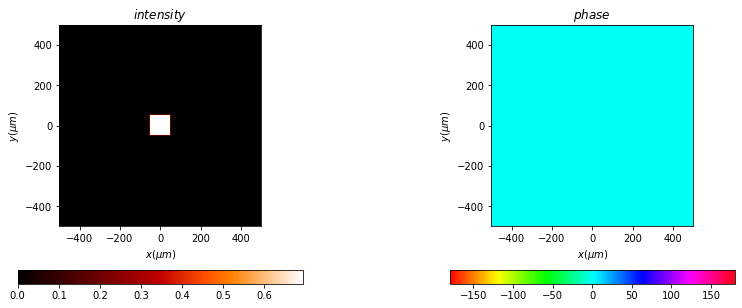

In [20]:
sq = Scalar_mask_XY(x0, y0, wavelength)
sq.square(
    r0=(0 * um, 0 * um),
    size=(100 * um, 100 * um),
    angle=0,
)
sq.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0df7d8af0>,
  <matplotlib.image.AxesImage at 0x2a0dfc882b0>),
 None,
 None)

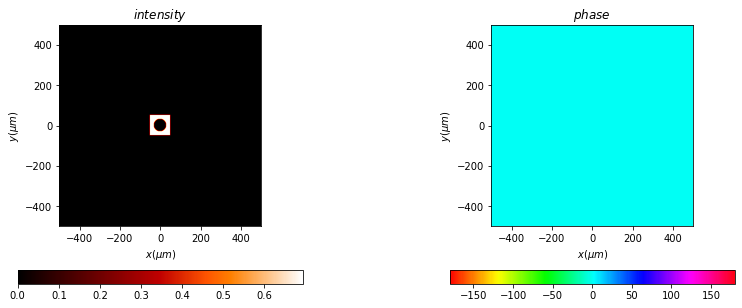

In [21]:
sqCirc = sq - circ
sqCirc.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0e016f700>,
  <matplotlib.image.AxesImage at 0x2a0e01eedf0>),
 None,
 None)

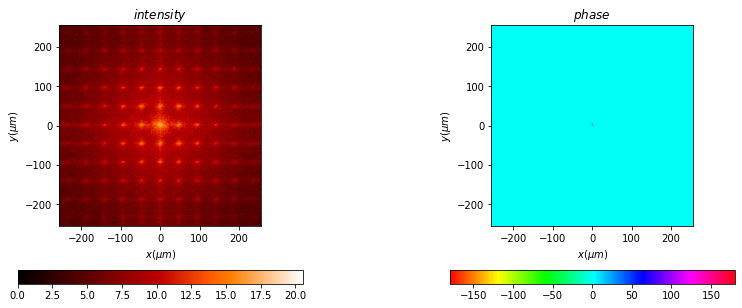

In [22]:
# After Lens 1
aftL1 = (u0 * img).fft(z=1 * mm, new_field=True)
aftL1.draw(kind='field', logarithm=True)
# aftL1.draw(kind='amplitude', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0e2691cd0>,
  <matplotlib.image.AxesImage at 0x2a0e26fdf40>),
 None,
 None)

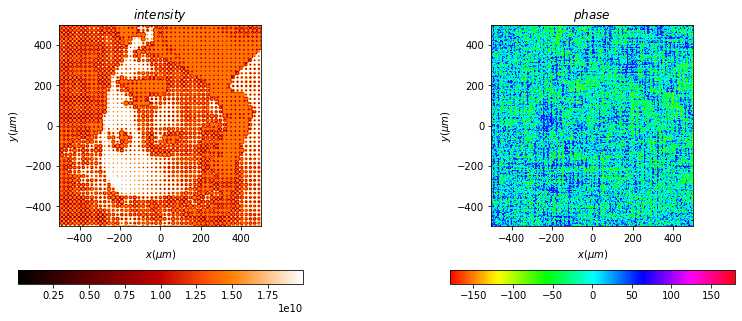

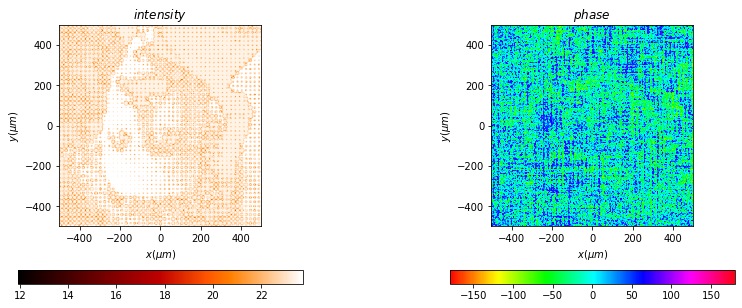

In [23]:
# At observation screen
aftL2 = aftL1.fft(z=1 * mm, shift=False, remove0=False, new_field=True)
aftL2.draw(kind='field', logarithm=False)
aftL2.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0e2824730>,
  <matplotlib.image.AxesImage at 0x2a0e4d5dc10>),
 None,
 None)

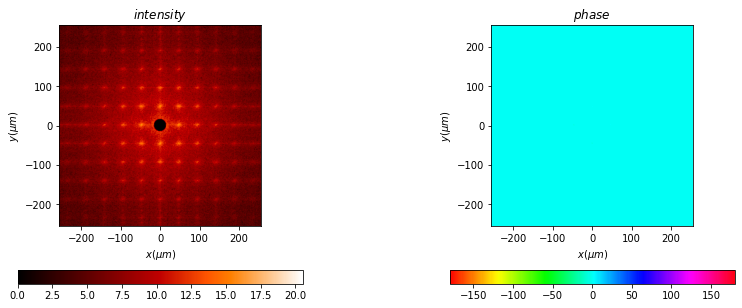

In [24]:
# At observation screen
befL2cDot = aftL1 * cDot
befL2cDot.draw(kind='field', logarithm=True)
# befL2cDot.draw(kind='amplitude', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0e4cf3430>,
  <matplotlib.image.AxesImage at 0x2a0e27baf10>),
 None,
 None)

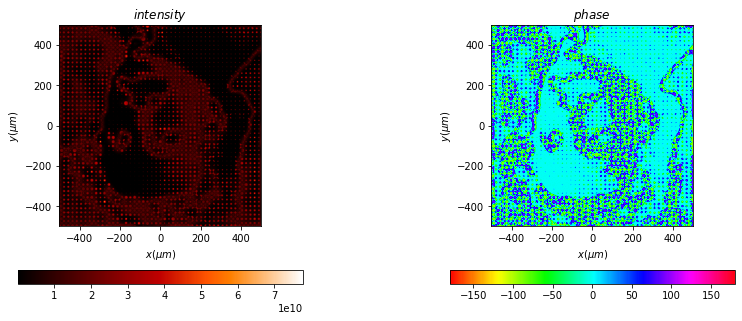

In [25]:
aftcDotL2 = (aftL1 * cDot).fft(z=1 * mm, shift=False, remove0=False, new_field=True)
aftcDotL2.draw(kind='field', logarithm=False)
# aftObstL2.draw(kind='real_field', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0e03358e0>,
  <matplotlib.image.AxesImage at 0x2a0e4e0d0a0>),
 None,
 None)

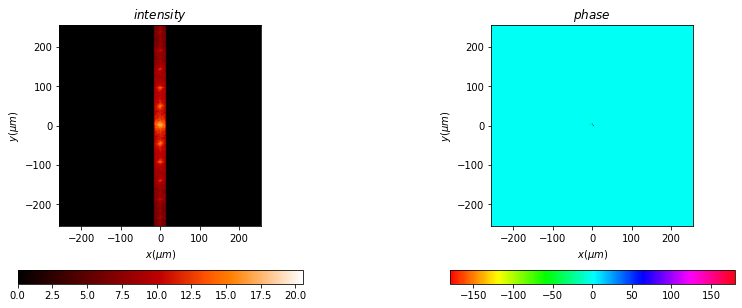

In [26]:
befL2Slit = aftL1 * slit
befL2Slit.draw(kind='field', logarithm=True)
# befL2Slit.draw(kind='amplitude', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0e56f5fa0>,
  <matplotlib.image.AxesImage at 0x2a0e5787760>),
 None,
 None)

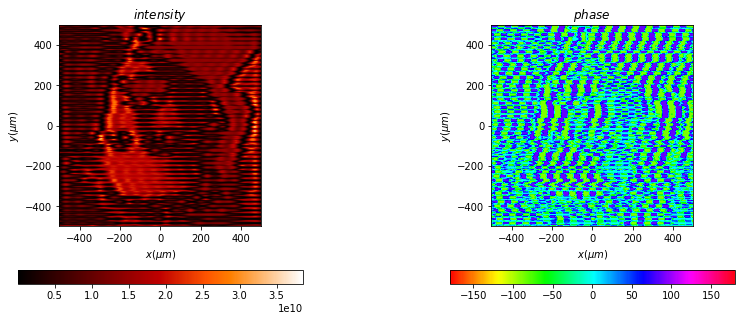

In [27]:
aftSlitL2 = (aftL1 * slit).fft(z=1 * mm, shift=False, remove0=False, new_field=True)
aftSlitL2.draw(kind='field', logarithm=False)
# aftSlitL2.draw(kind='intensity', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0e584ec10>,
  <matplotlib.image.AxesImage at 0x2a0e58c79d0>),
 None,
 None)

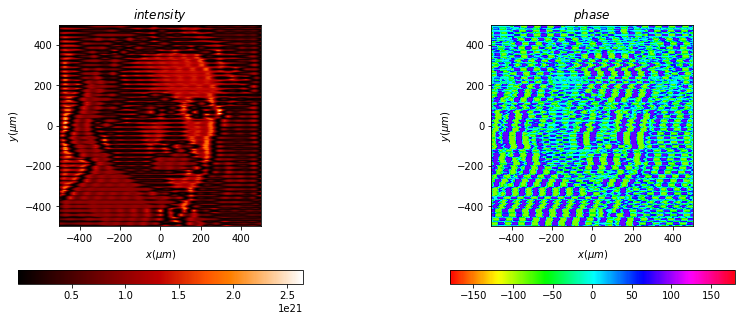

In [28]:
IFFTSlit = (aftSlitL2.fft(z=1 * mm, shift=False, remove0=False, new_field=True)).fft(z=1 * mm, shift=False, remove0=False, new_field=True)
IFFTSlit.draw(kind='field', logarithm=False)

((<matplotlib.image.AxesImage at 0x2a0e806da90>,
  <matplotlib.image.AxesImage at 0x2a0e8134250>),
 None,
 None)

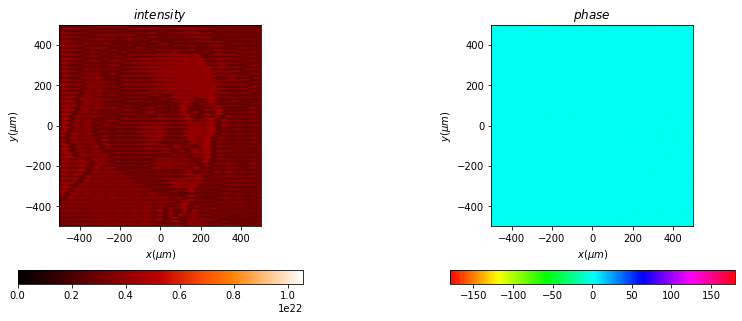

In [29]:
tmp = IFFTSlit.u
tmp = tmp.max() - tmp
IFFTSlit.u = tmp
IFFTSlit.draw(kind='field', logarithm=False)

((<matplotlib.image.AxesImage at 0x2a0e9b0deb0>,
  <matplotlib.image.AxesImage at 0x2a0e2c83460>),
 None,
 None)

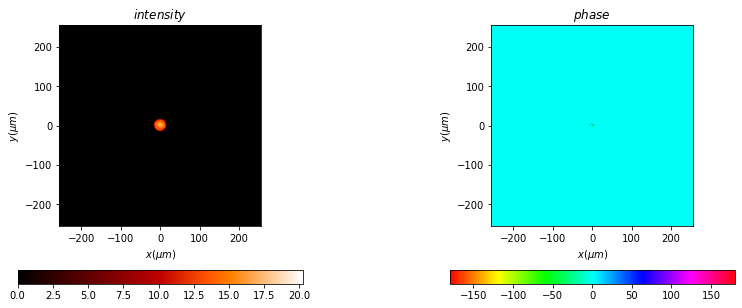

In [30]:
befL2Circ = aftL1 * circ
befL2Circ.draw(kind='field', logarithm=True)
# befL2Circ.draw(kind='amplitude', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0e1a9b580>,
  <matplotlib.image.AxesImage at 0x2a0e1b307f0>),
 None,
 None)

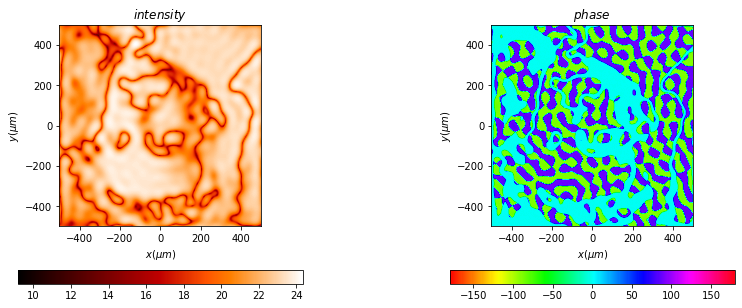

In [31]:
aftCircL2 = (aftL1 * circ).fft(z=1 * mm, shift=False, remove0=False, new_field=True)
aftCircL2.draw(kind='field', logarithm=True)
# aftCircL2.draw(kind='intensity', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0e1c023a0>,
  <matplotlib.image.AxesImage at 0x2a0e2f13610>),
 None,
 None)

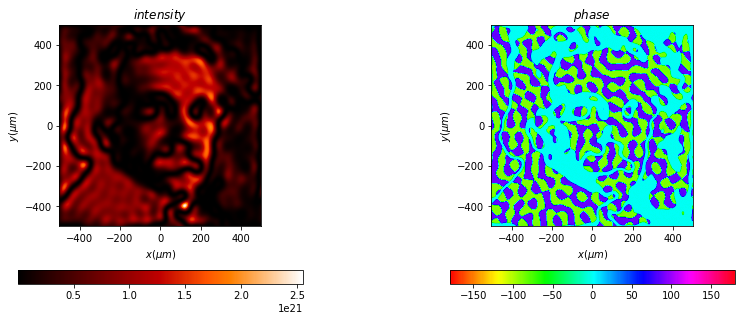

In [32]:
IFFTCirc = (aftCircL2.fft(z=1 * mm, shift=False, remove0=False, new_field=True)).fft(z=1 * mm, shift=False, remove0=False, new_field=True)
IFFTCirc.draw(kind='field', logarithm=False)

((<matplotlib.image.AxesImage at 0x2a0e27a4a90>,
  <matplotlib.image.AxesImage at 0x2a0e587fd30>),
 None,
 None)

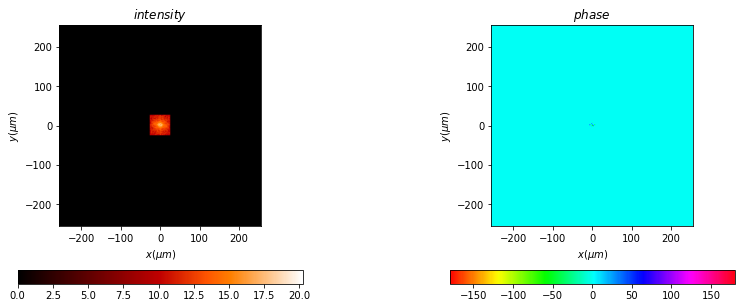

In [33]:
befL2Sq = aftL1 * sq
befL2Sq.draw(kind='field', logarithm=True)
# befL2Sq.draw(kind='amplitude', logarithm=True)

((<matplotlib.image.AxesImage at 0x2a0e3039d00>,
  <matplotlib.image.AxesImage at 0x2a0e532a4c0>),
 None,
 None)

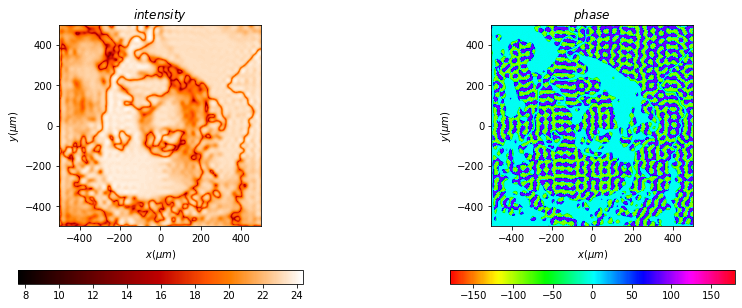

In [34]:
aftSqL2 = (aftL1 * sq).fft(z=1 * mm, shift=False, remove0=False, new_field=True)
aftSqL2.draw(kind='field', logarithm=True)
# aftSqL2.draw(kind='intensity', logarithm=True)